# 0 Setup

In [4]:
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import copy
from math import log2

In [5]:
curr_dir = '/ihome/xli/joh227/developer/ads/workspace/'

mturk_data_dir = curr_dir + 'data/mturk_data/'
output_dir = curr_dir + 'data/outputs/'
pickles_dir = output_dir + 'pickles/'
original_data_dir = curr_dir + 'data/original_data/'

In [6]:
task_list = [
    "creativity", 
    "originality",
    "atypicality", 
]

In [7]:
def read_pickle(checkpoint):
    return pickle.load(open(pickles_dir + 'batch_pred_' + checkpoint + '.pkl', 'rb'))

# def write_pickle(checkpoint):
#     return pickle.dump(open(output_dir + 'cleaned/' + checkpoint + '.pkl', 'wb'))

# 1 Data Clean UP

## 1.1 MTurk Data

- **mturk data, gpt4 model: merge two checkpoints**

In [5]:
gpt4_mturk_base = read_pickle('gpt4_0612_205705')
gpt4_mturk_disagreement = read_pickle('gpt4_0612_214338')

for i in range(20):
    for task in task_list:
        correct_disagreement = gpt4_mturk_disagreement['intrinsic'][task][i]['disagreements']
        if gpt4_mturk_base['intrinsic'][task][i]['disagreements'][0] != correct_disagreement[0]:
            print('updated!')
        gpt4_mturk_base['intrinsic'][task][i]['disagreements'] = copy.deepcopy(correct_disagreement)
        
        if gpt4_mturk_disagreement['intrinsic'][task][i]['true_disagreement'] != \
            gpt4_mturk_base['intrinsic'][task][i]['true_disagreement']: print('???')

# pickle.dump(gpt4_mturk_base, open(output_dir + 'cleaned/mturk_gpt4_0612_205705.pkl', 'wb'))

updated!
updated!
updated!
updated!
updated!
updated!
updated!
updated!


In [6]:
gpt4_mturk_pairwise = read_pickle('gpt4_0613_214108')

# pickle.dump(gpt4_mturk_pairwise, open(output_dir + 'cleaned/mturk_gpt4_pairwise_0613_214108.pkl', 'wb'))

- **mturk data, llava 7b: merge 2 checkpoints**

In [7]:

llava7b_first = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0612_222102')
llava7b_other = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0612_232503')

len(llava7b_first['intrinsic']['creativity']), len(llava7b_other['intrinsic']['creativity'])

for task in task_list:
    llava7b_other['intrinsic'][task] = [copy.deepcopy(llava7b_first['intrinsic'][task][0])] + \
                                            llava7b_other['intrinsic'][task]
    print(len(llava7b_other['intrinsic'][task]))
    
# pickle.dump(llava7b_other, open(output_dir + 'cleaned/mturk_llava7b_intrinsic_0612_232503.pkl', 'wb'))

20
20
20


In [8]:
len([llava7b_first['intrinsic']['creativity'][0]] + llava7b_other['intrinsic']['creativity'])

21

- **mturk data, llava 7b: check pairwise output**

In [9]:
llava7b_pairwise = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0612_221414')

for key in llava7b_pairwise['pairwise']:
    print(key, len(llava7b_pairwise['pairwise'][key]))

# pickle.dump(llava7b_pairwise, open(output_dir + 'cleaned/mturk_llava7b_pairwise_0612_221414.pkl', 'wb'))

creativity 58
atypicality 119
originality 106


In [10]:
# [pred['labels'][0] for pred in llava7b_pairwise['pairwise']['creativity']]

- **Mturk Data, llava 13b: check output**

In [60]:
llava13b_intrinsic = read_pickle('llava-hf-llava-v1.6-vicuna-13b-hf_0612_230716')
# batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_0612_230716
for key in llava13b_intrinsic['intrinsic']:
    print(key, len(llava13b_intrinsic['intrinsic'][key]))

# llava13b_pairwise = read_pickle('llava-hf-llava-v1.6-vicuna-13b-hf_0612_230716')
# # batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_0612_230716
# for key in llava13b_pairwise['intrinsic']:
#     print(key, len(llava13b_pairwise['intrinsic'][key]))
    
# pickle.dump(llava13b_intrinsic, open(output_dir + 'cleaned/mturk_llava13b_intrinsic_0612_230716.pkl', 'wb'))

creativity 20
atypicality 20
originality 20


In [61]:
from collections import Counter

In [62]:
Counter([dp['labels'][0] for dp in llava13b_intrinsic['intrinsic']['creativity']])

Counter({3: 10, 2: 8, 1: 2})

In [63]:
Counter([dp['labels'][0] for dp in llava13b_intrinsic['intrinsic']['atypicality']])

Counter({2: 9, 3: 7, 1: 4})

In [29]:
llava13b_intrinsic['intrinsic']['atypicality'][2]['labels'][0]

1

In [32]:
print(llava13b_intrinsic['intrinsic']['atypicality'][2]['labels'][1].lower().split('explanation:')[1])

 the advertisement features a beer can being held by a robotic arm or prosthetic limb, which is not an abnormal or atypical connotation related to beer or safety. it is a normal depiction of a can being held.


In [34]:
# llava13b_intrinsic['intrinsic']['atypicality'][0].keys()

- checking the output from vllm v.s. hf original 

In [67]:
hf_outputs = [dp['labels'] for dp in llava13b_intrinsic['intrinsic']['atypicality']]

In [68]:
vllm_outputs = pickle.load(open('majority_batch_outputs_new.pkl', 'rb'))
# vllm_outputs

In [69]:
ads_ids = ['0/109120.jpg', '0/139270.jpg', '0/159310.jpg', '0/25580.jpg', '0/52390.jpg'
, '0/81460.jpg', '0/84620.jpg', '0/85300.jpg', '0/95250.jpg', '1/108011.jpg'
, '1/112831.jpg', '1/116521.jpg', '1/119501.jpg', '1/121071.jpg'
, '1/130741.jpg', '1/84431.jpg', '2/122412.jpg', '2/124812.jpg', '2/18052.jpg'
, '2/69422.jpg']
len(ads_ids)

20

In [70]:
pd.DataFrame({
    'ads_id': ads_ids,
    'vllm': [v[1] for v in vllm_outputs],
    'hf': [v[1].lower().split('answer:')[1] for v in hf_outputs],
}).to_csv('tmp_hf_vllm_comp.csv', index = False)

## 1.2 Original Data

- **original data, gpt4: merge 2 checkpoints**

In [12]:
gpt4_first = read_pickle('gpt4_0612_220511')
gpt4_second = read_pickle('gpt4_0612_224413')

print(len(gpt4_first['intrinsic']['atypicality']), len(gpt4_second['intrinsic']['atypicality']))

gpt4_first['intrinsic']['atypicality'] = copy.deepcopy(gpt4_first['intrinsic']['atypicality'][:-2]) + \
                                    copy.deepcopy(gpt4_second['intrinsic']['atypicality'])

print(len(gpt4_first['intrinsic']['atypicality']), len(gpt4_second['intrinsic']['atypicality']))

# pickle.dump(gpt4_first, open(output_dir + 'cleaned/original_gpt4_0612_220511.pkl', 'wb'))

167 135
300 135


In [13]:
# gpt4_first['intrinsic'].keys()

- **original data, gpt4: pairwise data (done)**

In [14]:
od_gpt4_pairwise_old = read_pickle('gpt4_0612_224413')
od_gpt4_pairwise_new = read_pickle('gpt4_0613_154616')

print(len(od_gpt4_pairwise_old['pairwise']['atypicality']), len(od_gpt4_pairwise_new['pairwise']['atypicality']))

old_ids = [pred['ads_ids'] for pred in od_gpt4_pairwise_old['pairwise']['atypicality']]
for pred in od_gpt4_pairwise_new['pairwise']['atypicality']:
    # print(pred['ads_ids'], old_ids[0])
    if pred['ads_ids'] in old_ids: print(1)

od_gpt4_pairwise_old['pairwise']['atypicality'] = copy.deepcopy(od_gpt4_pairwise_old['pairwise']['atypicality']) + \
                                            copy.deepcopy(od_gpt4_pairwise_new['pairwise']['atypicality']) 
print(len(od_gpt4_pairwise_old['pairwise']['atypicality']))

# pickle.dump(od_gpt4_pairwise_old, open(output_dir + 'cleaned/original_gpt4_pairwise_0612_224413.pkl', 'wb'))

510 490
1000


- **original data, llava7b: check intrinsic data**

In [15]:
llava7b_intrinsic = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0612_233034')

for key in llava7b_intrinsic['intrinsic']:
    print(key, len(llava7b_intrinsic['intrinsic'][key]))

# pickle.dump(llava7b_intrinsic, open(output_dir + 'cleaned/original_llava7b_intrinsic_0612_233034.pkl', 'wb'))

atypicality 300


- **original data, llava7b: pairwise data (done)**

In [16]:
od_llava7b_pairwise = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0612_233034')
od_llava7b_pairwise_new = read_pickle('llava-hf-llava-v1.6-mistral-7b-hf_0613_151333')

print(len(od_llava7b_pairwise['pairwise']['atypicality']), len(od_llava7b_pairwise_new['pairwise']['atypicality']))

old_ids = [pred['ads_ids'] for pred in od_llava7b_pairwise['pairwise']['atypicality']]
for pred in od_llava7b_pairwise_new['pairwise']['atypicality']:
    if pred['ads_ids'] in old_ids: print(1)

od_llava7b_pairwise['pairwise']['atypicality'] = copy.deepcopy(od_llava7b_pairwise['pairwise']['atypicality']) + \
                                            copy.deepcopy(od_llava7b_pairwise_new['pairwise']['atypicality']) 
print(len(od_llava7b_pairwise['pairwise']['atypicality']))

# pickle.dump(od_llava7b_pairwise, open(output_dir + 'cleaned/original_llava7b_pairwise_0612_233034.pkl', 'wb'))

580 420
1000


In [17]:
# 500/33*10/60
# 1000 * 10 /60 

- **original data, llava 13b: intrinsic data (on going)**

In [18]:
od_llava_13b_intrinsic = read_pickle('llava-hf-llava-v1.6-vicuna-13b-hf_0613_113553')
print(len(od_llava_13b_intrinsic['intrinsic']['atypicality']))

# pickle.dump(od_llava_13b_intrinsic, open(output_dir + 'cleaned/original_llava13b_intrinsic_0613_113553.pkl', 'wb'))

300


- **original data, llava 13b: pairwise data (done)**

In [19]:
od_llava_13b_pairwise = read_pickle('llava-hf-llava-v1.6-vicuna-13b-hf_0613_152712')
print(len(od_llava_13b_pairwise['pairwise']['atypicality']))

# pickle.dump(od_llava_13b_pairwise, open(output_dir + 'cleaned/original_llava13b_pairwise_0613_152712.pkl', 'wb'))

1000


# 2 Intrinsic Eval

In [17]:
from sklearn.metrics import accuracy_score, f1_score

In [29]:
def get_prob(raw_values, unique_values = [1, 2, 3]):
    # unique_values = sorted(list(np.unique(kl_div)))
    # prob = []
    return np.array([
        (sum(np.array(raw_values) == k) + 1) / (len(raw_values) + len(unique_values))
        for k in unique_values
    ])

# # calculate the kl divergence
# def kl_divergence(true, pred):
#     q = get_prob(pred)
#     p = get_prob(true)
#     return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# def js_divergence(true, pred):
#     q = get_prob(pred)
#     p = get_prob(true)
#     m = 0.5 * (p + q)
#     return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

 
# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

def eval_intrinsic(intrinsic_pred, intrinsic_data, task):
    intrinsic_pred_task = intrinsic_pred[task]
    
    # single_label - correlation
    majority_labels = intrinsic_data[task + '_majority'].values
    true_labels = [pred['true_average'] for pred in intrinsic_pred_task]
    pred_labels = [pred['labels'][0] for pred in intrinsic_pred_task]
    single_label_corr = stats.spearmanr(true_labels, pred_labels) # get pearson r
    
    # single_label - accuracy
    single_label_acc = accuracy_score(majority_labels, pred_labels)
    single_label_f1 = f1_score(majority_labels, pred_labels, average = 'weighted')
    
    # distribution - KL
    kl = []
    # js =[]
    pred_distributions = [[p[0] for p in pred['label_distribution']] for pred in intrinsic_pred_task]
    true_distributions = [eval(lst) for lst in intrinsic_data[task + '_distribution'].values]
    # print(len(pred_distributions[0]), len(true_distributions[0]))
    if len(pred_distributions) > 0 and len(pred_distributions[0]) > 0:
        for i in range(len(pred_distributions)):
            q = get_prob(pred_distributions[i])
            p = get_prob(true_distributions[i])
            kl.append(kl_divergence(p, q))
            # js.append(js_divergence(p, q))
            

    # disagreement
    # pred_disagreements = [pred['disagreements'][0] for pred in intrinsic_pred_task]
    # true_disagreements = intrinsic_data[task + '_disagreement'].values
    # disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r

    return {
        "single_label_acc": round(single_label_acc, 4),
        "single_label_f1": round(single_label_f1, 4),
        "single_label_corr": round(single_label_corr.statistic, 4),
        "single_label_corr_p": round(single_label_corr.pvalue, 4),
        "kl_avg": round(np.mean(kl), 4) if len(kl) > 0 else None,
        # "js_avg": round(np.mean(js), 4) if len(js) > 0 else None,
        "pred_distributions": pred_distributions,
        "true_distributions": true_distributions,
        "all_kl": kl,
        # "disagreement_corr": round(disagreement_corr.statistic, 4),
        # "disagreement_corr_p": round(disagreement_corr.pvalue, 4),
    }
        
def eval_batch_intrinsic(batch_pred, original = False):
    intrinsic_pred = batch_pred['intrinsic']
    task_list = [
        "creativity", 
        "atypicality", 
        "originality"
    ]
    data_path = "./data/mturk_data/subset_0.5/" 
    intrinsic_data = pd.read_csv(data_path + "modeling_instrinsic_data.csv")
    if original: 
        task_list = ['atypicality']
        data_path = "./data/" 
        intrinsic_data = pd.read_csv(data_path + "modeling_instrinsic_atypicality_train.csv")

    eval_results = []
    for task in task_list:
        tmp_result = eval_intrinsic(intrinsic_pred, intrinsic_data, task)
        tmp_result['task'] = task
        eval_results.append(tmp_result)
    eval_result_df = pd.DataFrame(eval_results)
    # display(eval_result_df)
    return eval_result_df


In [32]:
data_path = "./data/mturk_data/subset_0.5/"
intrinsic_data = pd.read_csv(data_path + "modeling_instrinsic_data.csv")
# intrinsic_data.iloc[[10, 14]]
intrinsic_data.shape

(20, 19)

In [59]:
tmp_output = pickle.load(open(
        output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_1204_235115.pkl', 'rb'
    ))

In [60]:
data_path = "./data/mturk_data/subset_0.5/" 
intrinsic_data = pd.read_csv(data_path + "modeling_instrinsic_data.csv")
intrinsic_data.index = intrinsic_data['ads_id']
intrinsic_data.head(2)

,ads_id,creativity_distribution,creativity_value_count,creativity_average,creativity_disagreement,creativity_majority,creativity_majority_percentage,atypicality_distribution,atypicality_value_count,atypicality_average,atypicality_disagreement,atypicality_majority,atypicality_majority_percentage,originality_distribution,originality_value_count,originality_average,originality_disagreement,originality_majority,originality_majority_percentage
ads_id,,,,,,,,,,,,,,,,,,,
0/109120.jpg,0/109120.jpg,"[3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, ...","{1: 2, 2: 19, 3: 4}",2.08,0.2336,2,0.76,"[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","{1: 21, 3: 4}",1.32,0.5376,1,0.84,"[3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, ...","{1: 12, 2: 9, 3: 4}",1.68,0.5376,1,0.48
0/139270.jpg,0/139270.jpg,"[1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, ...","{1: 3, 2: 18, 3: 4}",2.04,0.2784,2,0.72,"[3, 1, 2, 1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, ...","{1: 7, 2: 8, 3: 10}",2.12,0.6656,3,0.40,"[3, 2, 3, 3, 3, 2, 2, 1, 1, 2, 3, 3, 2, 3, 1, ...","{1: 7, 2: 6, 3: 12}",2.20,0.7200,3,0.48


In [61]:
len(tmp_output['intrinsic']['atypicality']['ads_ids'])

20

In [62]:
# (tmp_output['intrinsic']['atypicality']['label_distribution'])[0]

In [63]:
# eval_batch_intrinsic(
#     pickle.load(open(
#         output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_1204_235115.pkl', 'rb'
#     ))
# )

In [64]:
task_list = ["atypicality", "creativity", "originality"]
tmp_output_intr_transformed = {task: [] for task in task_list}
for i in range(20):
    for task in task_list:
        ads_id = tmp_output['intrinsic'][task]['ads_ids'][i]
        true_average = intrinsic_data.loc[ads_id][task + '_average']
        true_distribution = intrinsic_data.loc[ads_id][task + '_distribution']
        true_disagreement = intrinsic_data.loc[ads_id][task + '_disagreement']
        tmp_dp = {
            'ads_id': ads_id,
            'labels': tmp_output['intrinsic'][task]['labels'][i],
            'label_distribution': tmp_output['intrinsic'][task]['label_distribution'][i],
            'disagreements': tmp_output['intrinsic'][task]['disagreements'][i],
            'true_average': true_average,
            'true_distribution': true_distribution,
            'true_disagreement': true_disagreement,
        }
        tmp_output_intr_transformed[task].append(tmp_dp)

In [65]:
tmp_output['intrinsic'] = tmp_output_intr_transformed

In [66]:
eval_batch_intrinsic(tmp_output)

,single_label_acc,single_label_f1,single_label_corr,single_label_corr_p,kl_avg,pred_distributions,true_distributions,all_kl,task
0,0.20,0.1332,0.3934,0.0861,0.7694,"[[2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3,...","[[3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,...","[0.8270584575681375, 0.4597093425408186, 0.175...",creativity
1,0.45,0.3375,0.4912,0.0279,0.8364,"[[3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1,...","[[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[2.154869483161003, 0.2383199017521784, 0.7560...",atypicality
2,0.70,0.7194,0.8072,0.0000,0.6075,"[[2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3,...","[[3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3,...","[0.7246137391680343, 0.4827073712960889, 0.012...",originality


In [67]:
batch_pred_llava_13b = pickle.load(open(output_dir + 'cleaned/mturk_llava13b_intrinsic_0612_230716.pkl', 'rb'))
llava_13b_eval_df = eval_batch_intrinsic(batch_pred_llava_13b)
llava_13b_eval_df

,single_label_acc,single_label_f1,single_label_corr,single_label_corr_p,kl_avg,pred_distributions,true_distributions,all_kl,task
0,0.45,0.4605,0.2970,0.2034,0.3045,"[[2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3,...","[[3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,...","[0.1966404207557515, 0.3385114685737499, 0.157...",creativity
1,0.50,0.5618,0.4938,0.0269,0.5513,"[[3, 1, 1, 2, 3, 1, 2, 2, 2, 2, 3, 1, 2, 3, 3,...","[[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1.075399938101587, 0.5479504914216776, 0.2256...",atypicality
2,0.30,0.3519,0.0824,0.7297,0.6640,"[[2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,...","[[3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3,...","[0.4898341717953933, 0.4783004209865406, 1.207...",originality


- **mturk data**

In [ ]:
# gpt4 - done
batch_pred_gpt4 = pickle.load(open(output_dir + 'cleaned/mturk_gpt4_0612_205705.pkl', 'rb'))
# eval_batch_intrinsic(batch_pred_gpt4).to_csv('./data/outputs/csv/mturk_gpt4_intrinsic.csv', index = False)

In [27]:
eval_batch_intrinsic(batch_pred_gpt4)

/scratch/slurm-920708/ipykernel_53095/428204867.py:61: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r


,single_label_acc,single_label_f1,single_label_corr,single_label_corr_p,kl_avg,pred_distributions,true_distributions,all_kl,disagreement_corr,disagreement_corr_p,task
0,0.5,0.5515,0.6697,0.0012,None,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,...",[],NaN,NaN,creativity
1,0.7,0.7387,0.7200,0.0003,None,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[],0.3934,0.0862,atypicality
2,0.5,0.5765,0.7008,0.0006,None,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3,...",[],0.0995,0.6765,originality


In [28]:
# llava 7b - done
batch_pred_llava_7b = pickle.load(open(output_dir + 'cleaned/mturk_llava7b_intrinsic_0612_232503.pkl', 'rb'))
llava_7b_eval_df = eval_batch_intrinsic(batch_pred_llava_7b)
llava_7b_eval_df.to_csv('../data/outputs/csv/mturk_llava7b_intrinsic.csv', index = False)

/scratch/slurm-920708/ipykernel_53095/428204867.py:61: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r
/scratch/slurm-920708/ipykernel_53095/428204867.py:61: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r
/scratch/slurm-920708/ipykernel_53095/428204867.py:61: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r


In [29]:
llava_7b_kl_lst = dict(zip(range(len(llava_7b_eval_df.all_kl.values[0])) , llava_7b_eval_df.all_kl.values[0] ))
sorted(llava_7b_kl_lst.items(), key = lambda x: x[1] )

[(10, 0.045615050094035076),
 (2, 0.06387291716425916),
 (11, 0.0644557372345779),
 (19, 0.1003158656748904),
 (8, 0.15326655202125591),
 (3, 0.16632486328160462),
 (9, 0.17784723290308618),
 (7, 0.46041649116532934),
 (0, 0.48623062505719944),
 (15, 0.5434173134228528),
 (5, 0.6113802730860578),
 (13, 0.6138161820914145),
 (6, 0.7029357251905705),
 (16, 0.708261222538149),
 (17, 0.7272888047785038),
 (4, 0.836142435596134),
 (1, 1.168236526979576),
 (12, 1.5166441446160346),
 (18, 1.6467972796737167),
 (14, 1.6844650993032482)]

In [30]:
# llava 13b - done
batch_pred_llava_13b = pickle.load(open(output_dir + 'cleaned/mturk_llava13b_intrinsic_0612_230716.pkl', 'rb'))
llava_13b_eval_df = eval_batch_intrinsic(batch_pred_llava_13b)
llava_13b_eval_df.to_csv('../data/outputs/csv/mturk_llava13b_intrinsic.csv', index = False)

In [31]:
llava_13b_kl_lst = dict(zip(range(len(llava_13b_eval_df.all_kl.values[0])) , llava_13b_eval_df.all_kl.values[0] ))
sorted(llava_13b_kl_lst.items(), key = lambda x: x[1] )

[(8, 0.02957628428585954),
 (10, 0.03666061188453232),
 (9, 0.039621543276147544),
 (5, 0.04028092725778645),
 (3, 0.0720387670910051),
 (16, 0.15020080719947973),
 (2, 0.1578126991157358),
 (15, 0.1748514660890451),
 (11, 0.18419890699717512),
 (0, 0.1966404207557515),
 (6, 0.22162937862805115),
 (7, 0.2633955996102595),
 (19, 0.3274714680669624),
 (1, 0.3385114685737499),
 (4, 0.3496179858282828),
 (17, 0.43059978620199),
 (13, 0.4408756716831094),
 (12, 0.6885448073661928),
 (18, 0.9599737809576955),
 (14, 0.9884555895749307)]

In [78]:
# !pip install seaborn
task_list

['creativity', 'atypicality', 'originality']

In [33]:
import seaborn as sns

In [82]:
low_kl_idx = 10
mid_kl_idx = 15
hig_kl_idx = 14

for i in [
    low_kl_idx, mid_kl_idx, hig_kl_idx
]:
    print('idx:', i)
    print('kl divergence (7b, 13b):', round(llava_7b_kl_lst[i], 4), round(llava_13b_kl_lst[i], 4))
    for task in task_list:
        pred_13b = batch_pred_llava_13b['intrinsic'][task][i]['labels'][0]
        pred_7b = batch_pred_llava_7b['intrinsic'][task][i]['labels'][0]
        pred_gpt4 = batch_pred_gpt4['intrinsic'][task][i]['labels'][0]
        avg = intrinsic_data[task + '_average'].iloc[i]
        print(task, 'human avg:', avg, '; pred_13b:', pred_13b, '; pred_7b:', pred_7b, '; pred_gpt4:', pred_gpt4,)

    print('\n-----------')

idx: 10
kl divergence (7b, 13b): 0.0456 0.0367
creativity human avg: 2.6 ; pred_13b: 3 ; pred_7b: 2 ; pred_gpt4: 3
originality human avg: 2.92 ; pred_13b: 2 ; pred_7b: 3 ; pred_gpt4: 3
atypicality human avg: 2.92 ; pred_13b: 3 ; pred_7b: 3 ; pred_gpt4: 3

-----------
idx: 15
kl divergence (7b, 13b): 0.5434 0.1749
creativity human avg: 1.84 ; pred_13b: 3 ; pred_7b: 3 ; pred_gpt4: 2
originality human avg: 1.44 ; pred_13b: 2 ; pred_7b: 3 ; pred_gpt4: 1
atypicality human avg: 1.28 ; pred_13b: 1 ; pred_7b: 2 ; pred_gpt4: 1

-----------
idx: 14
kl divergence (7b, 13b): 1.6845 0.9885
creativity human avg: 1.6 ; pred_13b: 2 ; pred_7b: 3 ; pred_gpt4: 2
originality human avg: 1.4 ; pred_13b: 2 ; pred_7b: 3 ; pred_gpt4: 1
atypicality human avg: 1.2 ; pred_13b: 1 ; pred_7b: 2 ; pred_gpt4: 1

-----------


In [69]:
data_path = "../data/mturk_data/subset_0.5/"
intrinsic_data = pd.read_csv(data_path + "modeling_instrinsic_data.csv")
intrinsic_data.iloc[[low_kl_idx, mid_kl_idx, hig_kl_idx]]

,ads_id,creativity_distribution,creativity_value_count,creativity_average,creativity_disagreement,creativity_majority,creativity_majority_percentage,atypicality_distribution,atypicality_value_count,atypicality_average,atypicality_disagreement,atypicality_majority,atypicality_majority_percentage,originality_distribution,originality_value_count,originality_average,originality_disagreement,originality_majority,originality_majority_percentage
10,1/112831.jpg,"[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, ...","{1: 1, 2: 8, 3: 16}",2.60,0.3200,3,0.64,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","{2: 2, 3: 23}",2.92,0.0736,3,0.92,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, ...","{2: 2, 3: 23}",2.92,0.0736,3,0.92
15,1/84431.jpg,"[2, 2, 1, 2, 2, 1, 3, 2, 3, 1, 2, 3, 2, 1, 2, ...","{1: 8, 2: 13, 3: 4}",1.84,0.4544,2,0.52,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","{1: 20, 2: 3, 3: 2}",1.28,0.3616,1,0.80,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, ...","{1: 18, 2: 3, 3: 4}",1.44,0.5664,1,0.72
14,1/130741.jpg,"[2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, ...","{1: 10, 2: 15}",1.60,0.2400,2,0.60,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","{1: 21, 2: 3, 3: 1}",1.20,0.2400,1,0.84,"[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...","{1: 18, 2: 4, 3: 3}",1.40,0.4800,1,0.72


In [51]:
low_kl_pred = {
    '13B': llava_13b_eval_df.pred_distributions.values[0][low_kl_idx],
    '7B': llava_7b_eval_df.pred_distributions.values[0][low_kl_idx],
    'human': llava_7b_eval_df['true_distributions'].values[0][low_kl_idx]
}

mid_kl_pred = {
    '13B': llava_13b_eval_df.pred_distributions.values[0][mid_kl_idx],
    '7B': llava_7b_eval_df.pred_distributions.values[0][mid_kl_idx],
    'human': llava_7b_eval_df['true_distributions'].values[0][mid_kl_idx]
}

hig_kl_pred = {
    '13B': llava_13b_eval_df.pred_distributions.values[0][hig_kl_idx],
    '7B': llava_7b_eval_df.pred_distributions.values[0][hig_kl_idx],
    'human': llava_7b_eval_df['true_distributions'].values[0][hig_kl_idx]
}

dict_keys(['labels', 'label_distribution', 'disagreements', 'true_average', 'true_distribution', 'true_disagreement'])

In [54]:
colors = {
    '13B': 'yellow', 
    '7B': 'pink', 
    'human': 'blue'
}
sns.set_theme(rc={'figure.figsize':(8,5)})

<Axes: xlabel='labels', ylabel='Count'>

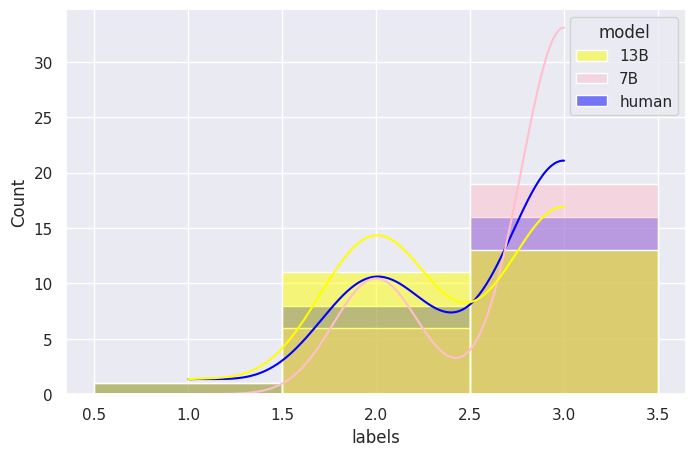

In [55]:
low_kl_pred_df = pd.DataFrame([low_kl_pred]).T
low_kl_pred_df['model'] = low_kl_pred_df.index
low_kl_pred_df['labels'] = low_kl_pred_df[0]
low_kl_pred_df = low_kl_pred_df[['model', 'labels']]
low_kl_pred_df = low_kl_pred_df.explode('labels')

sns.histplot(
    data = low_kl_pred_df, 
    x = 'labels', 
    hue = 'model', 
    palette = colors,
    # binwidth = 0.6
    bins = [0.5, 1.5, 2.5, 3.5],
    kde = True
)

<Axes: xlabel='labels', ylabel='Count'>

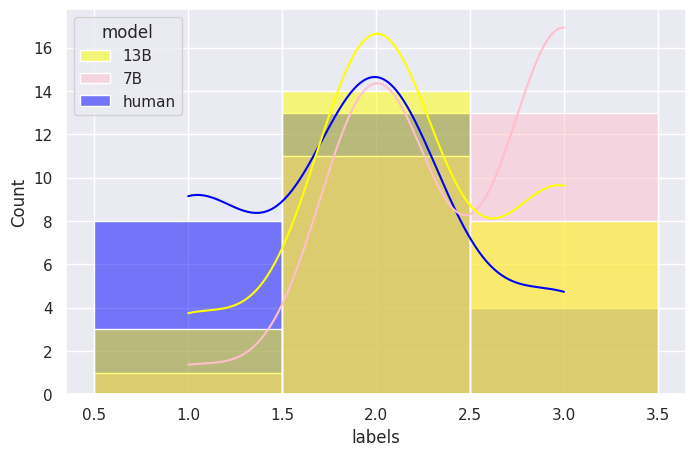

In [56]:
mid_kl_pred_df = pd.DataFrame([mid_kl_pred]).T
mid_kl_pred_df['model'] = mid_kl_pred_df.index
mid_kl_pred_df['labels'] = mid_kl_pred_df[0]
mid_kl_pred_df = mid_kl_pred_df[['model', 'labels']]
mid_kl_pred_df = mid_kl_pred_df.explode('labels')

sns.histplot(
    data = mid_kl_pred_df, 
    x = 'labels', 
    hue = 'model', 
    palette = colors,
    # binwidth = 0.6
    bins = [0.5, 1.5, 2.5, 3.5],
    kde = True
)

<Axes: xlabel='labels', ylabel='Count'>

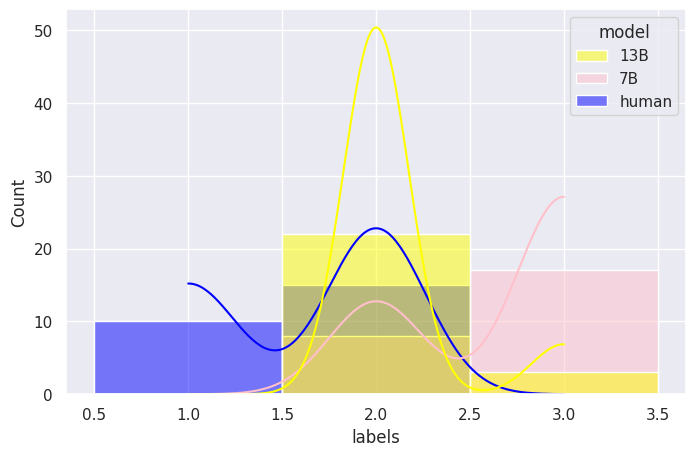

In [57]:
hig_kl_pred_df = pd.DataFrame([hig_kl_pred]).T
hig_kl_pred_df['model'] = hig_kl_pred_df.index
hig_kl_pred_df['labels'] = hig_kl_pred_df[0]
hig_kl_pred_df = hig_kl_pred_df[['model', 'labels']]
hig_kl_pred_df = hig_kl_pred_df.explode('labels')

sns.histplot(
    data = hig_kl_pred_df, 
    x = 'labels', 
    hue = 'model', 
    palette = colors,
    # binwidth = 0.6
    bins = [0.5, 1.5, 2.5, 3.5],
    kde = True
)

- **original data**

In [166]:
# gpt4 - done
batch_pred_gpt4 = pickle.load(open(output_dir + 'cleaned/original_gpt4_0612_220511.pkl', 'rb'))
eval_batch_intrinsic(batch_pred_gpt4, original = True).to_csv('../data/outputs/csv/mturk_gpt4_intrinsic_od.csv', index = False)

In [167]:
# llava 7b - done
batch_pred_llava_7b_od = pickle.load(open(output_dir + 'cleaned/original_llava7b_intrinsic_0612_233034.pkl', 'rb'))
eval_batch_intrinsic(batch_pred_llava_7b_od, original = True).to_csv('../data/outputs/csv/mturk_llava7b_intrinsic_od.csv', index = False)

/scratch/slurm-919139/ipykernel_59350/1596976171.py:61: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  disagreement_corr = stats.spearmanr(pred_disagreements, true_disagreements) #.statistic # get pearson r


In [168]:
# llava 13b - TODO, not finished
batch_pred_llava_13b_od = pickle.load(open(output_dir + 'cleaned/original_llava13b_intrinsic_0613_113553.pkl', 'rb'))
eval_batch_intrinsic(batch_pred_llava_13b_od, original = True).to_csv('../data/outputs/csv/mturk_llava13b_intrinsic_od.csv', index = False)

# 3 Pairwise Eval

In [1]:
from sklearn.metrics import accuracy_score, f1_score

In [2]:
def eval_pairwise_single(pairwise_pred_task):
    
    # print(len(pairwise_pred_task))
    correct = 0
    all_target = []
    all_pred = [pred['labels'][0] for pred in pairwise_pred_task]
    for pred in pairwise_pred_task:
        if pred['true'] > 0:
            all_target.append(1)
        else:
            all_target.append(2)

    # filter out str predictions 
    all_pred_cleaned = []
    all_target_cleaned = []
    num_dropped = 0
    for i in range(len(all_pred)):
        if isinstance(all_pred[i], str): 
            num_dropped += 1
            continue 
        all_pred_cleaned.append(all_pred[i])
        all_target_cleaned.append(all_target[i])
    # print('# of dp dropped:', num_dropped)
    
    all_pred = all_pred_cleaned
    all_target = all_target_cleaned
    
    if len(pairwise_pred_task) == 0: return 0, 0, 0

    print('unique_pred:', np.unique(all_pred))
    print('unique_target:', np.unique(all_target))
    acc = round(accuracy_score(all_target, all_pred), 4)
    f1 = round(f1_score(all_target, all_pred), 4)
    return acc, f1, num_dropped

def eval_batch_pairwise(batch_pred, original = False):
    task_list = [
        "creativity", 
        "atypicality", 
        "originality"
    ]
    if original: task_list = ['atypicality']
        
    pairwise_pred = batch_pred['pairwise']
    eval_results = []
    for task in task_list:
        tmp_result = {'task': task}
        acc, f1, num_dropped = eval_pairwise_single(pairwise_pred[task])
        print('task:', task, '# of dp dropped:', num_dropped)
        tmp_result['pairwise_accuracy'] = acc
        tmp_result['pairwise_f1'] = f1
        if len(batch_pred['pairwise'][task]) > 0:
            tmp_result['pred_1'] = sum([pred['labels'][0] == 1 for pred in batch_pred['pairwise'][task]]) / len(batch_pred['pairwise'][task])
            tmp_result['pos_labels'] = sum([pred['true'] > 0 for pred in batch_pred['pairwise'][task]]) / len(batch_pred['pairwise'][task])
        
        tmp_result['dp_count'] = len(batch_pred['pairwise'][task])
        eval_results.append(tmp_result)
    eval_result_df = pd.DataFrame(eval_results)
    return eval_result_df

- **MTurk Data**

In [9]:
## done 
batch_pred_llava_7b_pairwise = pickle.load(
    open(output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-mistral-7b-hf_0613_231131.pkl', 'rb')
)
llava_7b_pairwise_df = eval_batch_pairwise(batch_pred_llava_7b_pairwise)
# llava_7b_pairwise_df.to_csv('../data/outputs/csv/mturk_llava7b_pairwise.csv', index = False)
llava_7b_pairwise_df

unique_pred: [1 2]
unique_target: [1 2]
task: creativity # of dp dropped: 0
unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 0
unique_pred: [1 2]
unique_target: [1 2]
task: originality # of dp dropped: 1


,task,pairwise_accuracy,pairwise_f1,pred_1,pos_labels,dp_count
0,creativity,0.7455,0.7200,0.400000,0.509091,55
1,atypicality,0.8142,0.7835,0.424779,0.433628,113
2,originality,0.7196,0.7581,0.601852,0.546296,108


In [12]:
## done
batch_pred_llava_13b_pairwise = pickle.load(
    open(output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_0613_231148.pkl', 'rb')
)
eval_batch_pairwise(batch_pred_llava_13b_pairwise)#.to_csv('../data/outputs/csv/mturk_llava13b_pairwise.csv', index = False)

unique_pred: [1 2]
unique_target: [1 2]
task: creativity # of dp dropped: 15
unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 5
unique_pred: [1 2]
unique_target: [1 2]
task: originality # of dp dropped: 24


,task,pairwise_accuracy,pairwise_f1,pred_1,pos_labels,dp_count
0,creativity,0.6500,0.7083,0.527273,0.509091,55
1,atypicality,0.6667,0.7188,0.707965,0.433628,113
2,originality,0.6190,0.7576,0.759259,0.546296,108


In [13]:
## gpt4 - done 
batch_pred_gpt4_pairwise = pickle.load(open(output_dir + 'pickles/batch_pred_gpt4_0614_000722.pkl', 'rb'))
eval_batch_pairwise(batch_pred_gpt4_pairwise)#.to_csv('../data/outputs/csv/mturk_gpt4_pairwise.csv', index = False)

unique_pred: [1 2]
unique_target: [1 2]
task: creativity # of dp dropped: 0
unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 0
unique_pred: [1 2]
unique_target: [1 2]
task: originality # of dp dropped: 0


,task,pairwise_accuracy,pairwise_f1,pred_1,pos_labels,dp_count
0,creativity,0.9091,0.9020,0.418182,0.509091,55
1,atypicality,0.9027,0.8764,0.353982,0.433628,113
2,originality,0.9722,0.9744,0.537037,0.546296,108


In [14]:
def eval_pairwise(pkl_dir):
    batch_pred_pairwise = pickle.load(
        open(pkl_dir, 'rb')
    )
    return eval_batch_pairwise(batch_pred_pairwise)

In [ ]:
eval_pairwise(
    output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_1204_232222.pkl'
)

unique_pred: [1 2]
unique_target: [1 2]
task: creativity # of dp dropped: 2
unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 0
unique_pred: [1 2]
unique_target: [1 2]
task: originality # of dp dropped: 21


,task,pairwise_accuracy,pairwise_f1,pred_1,pos_labels,dp_count
0,creativity,0.6226,0.7143,0.800000,0.509091,55
1,atypicality,0.6549,0.7023,0.725664,0.433628,113
2,originality,0.6207,0.7273,0.712963,0.546296,108


- **Original Data**

In [175]:
# gpt4 - todo
od_batch_pred_gpt4_pairwise = pickle.load(open(output_dir + 'cleaned/original_gpt4_pairwise_0612_224413.pkl', 'rb')) 
eval_batch_pairwise(od_batch_pred_gpt4_pairwise, True).to_csv('../data/outputs/csv/mturk_gpt4_pairwise_od.csv', index = False)

unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 1


In [176]:
# llava 7b
# od_batch_pred_llava7b_pairwise = pickle.load(open(output_dir + 'cleaned/original_llava7b_pairwise_0612_233034.pkl', 'rb'))

od_batch_pred_llava7b_pairwise = pickle.load(
    open(output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-mistral-7b-hf_0614_012513.pkl', 'rb')
)
eval_batch_pairwise(od_batch_pred_llava7b_pairwise, True).to_csv('../data/outputs/csv/mturk_llava7b_pairwise_od.csv', index = False)

unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 2


In [391]:
# # llava 13b 
# od_batch_pred_llava13b_pairwise = pickle.load(open(output_dir + 'cleaned/original_llava13b_pairwise_0613_152712.pkl', 'rb'))
# eval_batch_pairwise(od_batch_pred_llava13b_pairwise, True)

In [177]:
# llava 13b 
od_batch_pred_llava13b_pairwise = pickle.load(
    open(output_dir + 'pickles/batch_pred_llava-hf-llava-v1.6-vicuna-13b-hf_0614_012145.pkl', 'rb')
)
eval_batch_pairwise(od_batch_pred_llava13b_pairwise, True).to_csv('../data/outputs/csv/mturk_llava13b_pairwise_od.csv', index = False)

unique_pred: [1 2]
unique_target: [1 2]
task: atypicality # of dp dropped: 49
